# Online Retail Analysis

*Data set used here obtained from https://archive.ics.uci.edu/ml/*

### Exploratory data analysis

In [3]:
import pandas as pd

#data stored in excel sheets 
xl=pd.ExcelFile("../OnlineRetail.xlsx")

#get sheet names
print("sheet names",xl.sheet_names)


data=xl.parse("Online Retail")

#number of rows and columns
print(data.shape)

#first 5 rows
print(data.head())

#value properties
print(data.info())

sheet names ['Online Retail']
(541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object

InvoiceDate is in the type of Date Time format. Let's visualize Quantity as time series data.

### Plot daily retail quantity

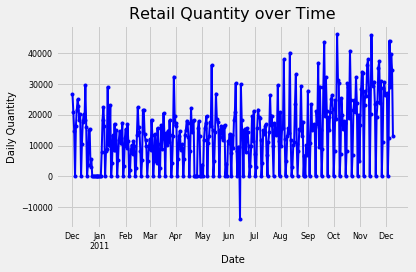

In [4]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

#set index to data time
data=data.set_index('InvoiceDate')

quantity_df=data["Quantity"]

#resample by daily retail
daily_quan=quantity_df.resample('D').sum()

ax=daily_quan.plot(color='blue',linewidth=2,fontsize=8,style='.-')
ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('Daily Quantity',fontsize=10)
ax.set_title('Retail Quantity over Time',fontsize=16)
plt.tight_layout()
plt.show()

In general retail quantity gets higher in the latter part of year. We can also see some negative quantities as well.Let's check monthly average quantity throuh out the year.  

### Monthly average sales

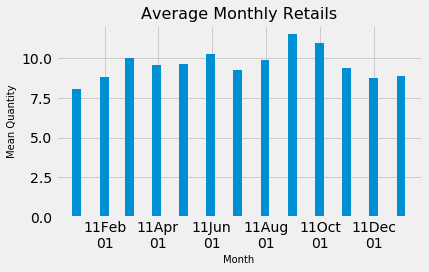

In [6]:
import matplotlib.dates as mdates

#resample by the month
mon_mean = quantity_df.resample('M').mean()


plt.bar(mon_mean.index.to_pydatetime(), mon_mean[:], width=10)
ax=plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y%b\n%d'))
ax.set_xlabel('Month',fontsize=10)
ax.set_ylabel('Mean Quantity',fontsize=10)
ax.set_title('Average Monthly Retails',fontsize=16)
plt.tight_layout()
plt.show()

Septemper has the highest sales. Next Let's find out best customers.

### Top 10 customers

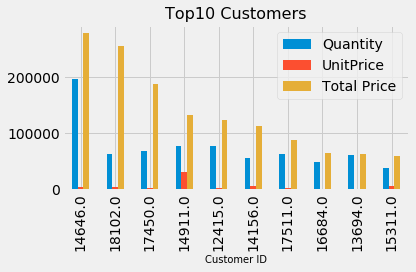

In [11]:
#calculate total price and store in a new column "Total Price"
data["Total Price"] = data["UnitPrice"] * data["Quantity"]

#group by customer
total_price=data.groupby("CustomerID").sum().sort_values("Total Price", ascending=False)

top_10 = total_price.nlargest(10, columns="Total Price")
ax = top_10.plot(kind="bar")
ax.set_xlabel('Customer ID',fontsize=10)
ax.set_title('Top10 Customers',fontsize=16)
plt.tight_layout()
plt.show()

Customer with ID 14636 is the top customer. We can further anlyse which items they bought together. That will help in creating personalized advertisments. How about customers who buy most spread out countrywise?

### Customers by country

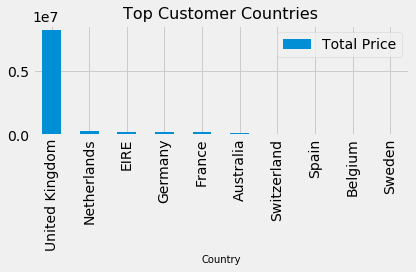

In [14]:
df_country = data[["Country", "Total Price"]]

#group by country
total_count=df_country.groupby("Country").sum() 
top_10 = total_count.nlargest(10, columns="Total Price")

ax = top_10.plot(kind="bar")
ax.set_xlabel('Country',fontsize=10)
ax.set_title('Top Customer Countries',fontsize=16)
plt.tight_layout()
plt.show()